In [1]:
#Prerequisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import accuracy_score,recall_score,precision_score,auc,confusion_matrix,f1_score,precision_recall_fscore_support,classification_report

## 1. Data Acquisition <a class="anchor" id="DA"></a>

Data sets are fetched from reading .csv files.

In [2]:
data=pd.read_csv("bank-additional-full.csv")

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Exploratory Data Analysis <a class="anchor" id="EDA"></a>
### 2.1 Data information
Understanding the given dataset and helps clean up the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.2 Missing values
Detecting Null or NA values in the dataframe in order to avoid bias or the loss of accuracy.

In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 2.3 Duplicate rows
Detecting duplicate rows in the dataframe in order to avoid bias or the loss of accuracy.

In [6]:
data.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [7]:
data=data.drop_duplicates()

In [8]:
data.shape

(41176, 21)

### 2.4 Categorical Variables
Finding categorical variables that need to be one-hot encoded in the future.

In [9]:
categorical=[]

#Finding character variables in the data frame
for i in data.columns:
    if data[i].dtype=='O':
        categorical.append(i)

In [10]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### 2.5 Data balance
Finding categorical variables that need to be one-hot encoded in the future.

In [11]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

#### 2.5.1 Undersampling

In [12]:
# Class count
count_class_0, count_class_1 = data['y'].value_counts()

# Divide by class
data_class_0 = data[data['y'] == 'no']
data_class_1 = data[data['y'] == 'yes']

In [13]:
data_class_0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [14]:
data_class_0_under = data_class_0.sample(n=count_class_1)
data_under = pd.concat([data_class_0_under, data_class_1], axis=0)

data_under['y'].value_counts()

no     4639
yes    4639
Name: y, dtype: int64

In [15]:
data_under1=data_under
data_under2=data_under
data_under3=data_under

#### 2.5.2 Oversampling

In [16]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_over = pd.concat([data_class_0, data_class_1_over], axis=0)

data_over['y'].value_counts()

no     36537
yes    36537
Name: y, dtype: int64

In [17]:
data_over1=data_over
data_over2=data_over
data_over3=data_over

### 2.6 Outlier removal
Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement and due to misinterpretation in filling data points.

One of the simplest methods for detecting outliers is box plots. A box plot is a graphical display for describing the distributions of the data. Box plots use the median and the lower and upper quartiles. 

In [18]:
data_under.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000
mean,40.432960,389.552598,2.326471,887.687217,0.312891,-0.489211,93.479128,-40.206585,2.971193,5135.853471
std,12.025501,360.742255,2.335458,313.304195,0.697914,1.722400,0.631613,5.344737,1.889231,87.171539
min,17.000000,3.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,145.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,266.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,530.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
data_over.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000
mean,40.452555,387.472179,2.347689,888.292197,0.312136,-0.496302,93.478456,-40.185520,2.964169,5135.495717
std,12.068697,359.840471,2.374014,312.556395,0.701365,1.725394,0.633923,5.366896,1.890334,87.018998
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,144.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,526.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The standard deviation indicates the dispersion of the data relative to its mean and is calculated as the square root of the variance.

From above results, we can see that 'duration','pdays' and 'nr.employed' have high std. However, 'pdays' aligns with uniform distribution and can not be dealt with quartile removal. In this way, we decide to remove outliers for the other features first by drawing box plot.

Text(0.5, 1.0, 'Distribution of pdays')

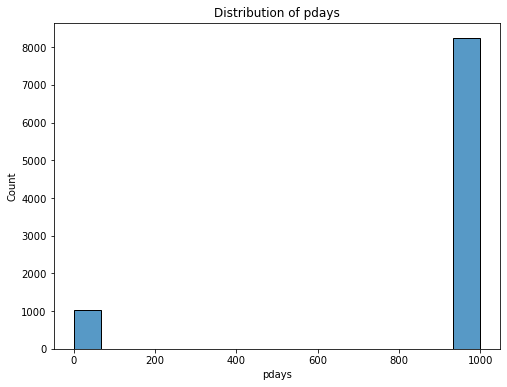

In [20]:
fig,ax=plt.subplots(figsize=(8,6))
#ax.set_xlim(0,)
sns.histplot(data_under['pdays'],ax=ax).set_title('Distribution of pdays')

'duration' of undersample

Text(0.5, 0, 'feature')

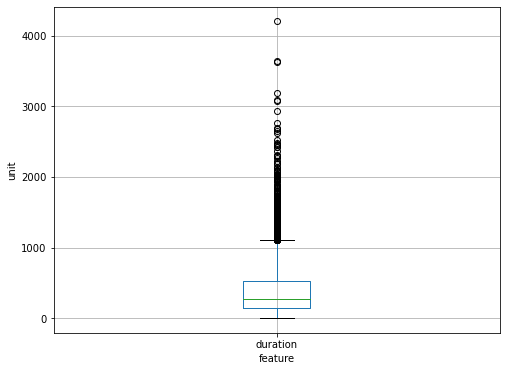

In [21]:
#Box plot
boxplot=data_under1.boxplot(column=['duration'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [22]:
num1=data_under1.shape[0]
Q1 = data_under1['duration'].quantile(0.25)
Q3 = data_under1['duration'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data_under1['duration'] >= Q1 - 1.5 * IQR) & (data_under1['duration'] <= Q3 + 1.5 *IQR)
data_under1=data_under1.loc[filter]

Text(0.5, 0, 'feature')

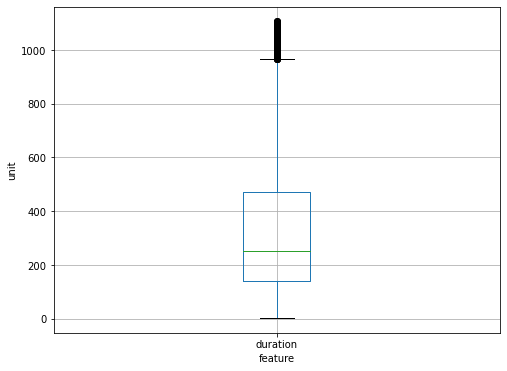

In [23]:
#Box plot
boxplot=data_under1.boxplot(column=['duration'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

'nr.employed' of undersample

Text(0.5, 0, 'feature')

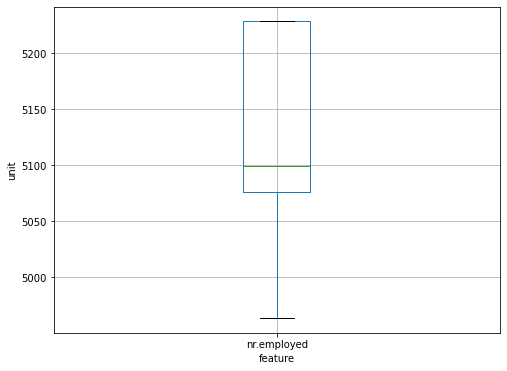

In [24]:
#Box plot
boxplot=data_under1.boxplot(column=['nr.employed'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [25]:
num1=data_under1.shape[0]
Q1 = data_under1['nr.employed'].quantile(0.25)
Q3 = data_under1['nr.employed'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data_under1['nr.employed'] >= Q1 - 1.5 * IQR) & (data_under1['nr.employed'] <= Q3 + 1.5 *IQR)
data_under1=data_under1.loc[filter]

Text(0.5, 0, 'feature')

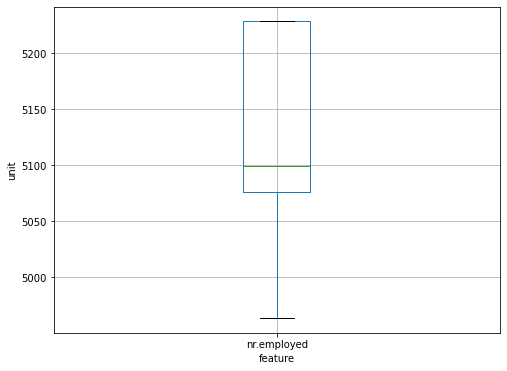

In [26]:
#Box plot
boxplot=data_under1.boxplot(column=['nr.employed'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [27]:
data_under1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000
mean,40.448049,333.127836,2.315676,883.880331,0.322028,-0.523934,93.471878,-40.181897,2.933684,5134.108689
std,12.100291,253.883678,2.352789,317.930726,0.708490,1.724020,0.634805,5.384404,1.889619,87.379008
min,17.000000,3.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,139.750000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.241750,5076.200000
50%,38.000000,251.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-41.800000,1.757000,5099.100000
75%,48.000000,471.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,1106.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [28]:
data_under1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16177,49,admin.,married,high.school,no,no,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
14758,31,blue-collar,married,basic.9y,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
3404,30,technician,single,professional.course,no,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
33712,32,blue-collar,single,basic.9y,unknown,no,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
32296,37,blue-collar,married,basic.4y,no,no,yes,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2.7 Correlation coefficient
A high correlation coefficient would lead to a chance that the performance of the model will be impacted by the multicollinearity.

#### 2.7.1 Heatmap
Those VIFs who are greater than 10 would be considered as high multicollinearity features, thus should be removed.

C:\Users\intwe\AppData\Local\Temp\ipykernel_8492\2744395354.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_under1.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot:>

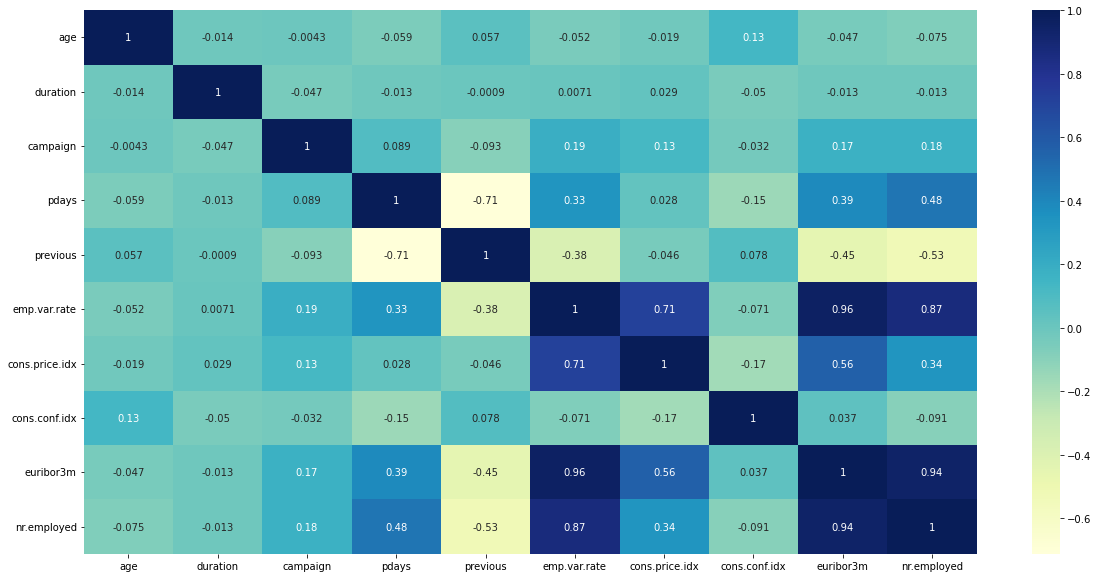

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(data_under1.corr(), annot=True, cmap='YlGnBu')

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
X = data_under2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
result=calc_vif(X)
result

,variables,VIF
0,age,12.593452
1,duration,2.185732
2,campaign,2.074752
3,pdays,19.256198
4,previous,2.695759
5,emp.var.rate,27.735311
6,cons.price.idx,16695.860278
7,cons.conf.idx,85.611858
8,euribor3m,137.854400
9,nr.employed,19906.960731


In [32]:
data_under3=data_under3[[str(i) for i in result[result['VIF']<10]['variables']]]
data_under3

,duration,campaign,previous
16177,443,1,0
14758,715,1,0
3404,584,2,0
33712,785,1,0
32296,269,1,0
...,...,...,...
41174,208,1,6
41178,483,2,3
41181,281,1,0
41183,334,1,0


#### 2.7.2 Multicollinearity function
Using Variable Inflation Factor (VIF), setting it with a default threshold of 5.0. Those features that are greater than 5.0 would be considered high multicollinearity and will be removed.

In [33]:
from joblib import Parallel, delayed
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def removeMultiColl(data, vif_threshold = 5.0):
    for i in data.columns:
        if data[i].nunique() == 1:
            print(f"Dropping {i} due to just 1 unique value")
            data.drop(columns = i, inplace = True)
    drop = True
    col_list = list(data.columns)
    while drop == True:
        drop = False
        vif_list = Parallel(n_jobs = -1, verbose = 5)(delayed(variance_inflation_factor)(data[col_list].values, i) for i in range(data[col_list].shape[1]))
        max_index = vif_list.index(max(vif_list))
        if vif_list[max_index] > vif_threshold:
            print(f"Dropping column : {col_list[max_index]} at index - {max_index}")
            del col_list[max_index]
            drop = True
    print("Remaining columns :\n", list(data[col_list].columns))
    return data[col_list]

In [34]:
data_test=removeMultiColl(X)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Dropping column : nr.employed at index - 9
Dropping column : cons.price.idx at index - 6
Dropping column : cons.conf.idx at index - 6
Dropping column : euribor3m at index - 6
Dropping column : age at index - 0
Remaining columns :
 ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']


[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent w

In [35]:
data_test

,duration,campaign,pdays,previous,emp.var.rate
16177,443,1,999,0,1.4
14758,715,1,999,0,1.4
3404,584,2,999,0,1.1
33712,785,1,999,0,-1.8
32296,269,1,999,0,-1.8
...,...,...,...,...,...
41174,208,1,1,6,-1.1
41178,483,2,6,3,-1.1
41181,281,1,999,0,-1.1
41183,334,1,999,0,-1.1


In [36]:
data_undersample1=data_under[categorical].join(data_under3)

In [37]:
data_undersample1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,duration,campaign,previous
16177,admin.,married,high.school,no,no,no,cellular,jul,tue,nonexistent,no,443,1,0
14758,blue-collar,married,basic.9y,no,no,no,cellular,jul,wed,nonexistent,no,715,1,0
3404,technician,single,professional.course,no,no,no,telephone,may,thu,nonexistent,no,584,2,0
33712,blue-collar,single,basic.9y,unknown,no,no,cellular,may,wed,nonexistent,no,785,1,0
32296,blue-collar,married,basic.4y,no,no,yes,cellular,may,fri,nonexistent,no,269,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,208,1,6
41178,retired,married,university.degree,no,no,no,cellular,nov,thu,success,yes,483,2,3
41181,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes,281,1,0
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,334,1,0


In [38]:
data_undersample2=data_under[categorical].join(data_test)

In [39]:
data_undersample2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,duration,campaign,pdays,previous,emp.var.rate
16177,admin.,married,high.school,no,no,no,cellular,jul,tue,nonexistent,no,443,1,999,0,1.4
14758,blue-collar,married,basic.9y,no,no,no,cellular,jul,wed,nonexistent,no,715,1,999,0,1.4
3404,technician,single,professional.course,no,no,no,telephone,may,thu,nonexistent,no,584,2,999,0,1.1
33712,blue-collar,single,basic.9y,unknown,no,no,cellular,may,wed,nonexistent,no,785,1,999,0,-1.8
32296,blue-collar,married,basic.4y,no,no,yes,cellular,may,fri,nonexistent,no,269,1,999,0,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,208,1,1,6,-1.1
41178,retired,married,university.degree,no,no,no,cellular,nov,thu,success,yes,483,2,6,3,-1.1
41181,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes,281,1,999,0,-1.1
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,334,1,999,0,-1.1


#### 2.7.3 Important features
Running a random forest model and then getting the most important features

In [40]:
data_under4=data_under

In [41]:
data_under4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16177,49,admin.,married,high.school,no,no,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
14758,31,blue-collar,married,basic.9y,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
3404,30,technician,single,professional.course,no,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
33712,32,blue-collar,single,basic.9y,unknown,no,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
32296,37,blue-collar,married,basic.4y,no,no,yes,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [42]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_under4[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_under4=data_under4.drop(columns=i)
    data_under4=data_under4.join(one_hot)

In [43]:
data_under4

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
16177,49,443,1,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,0,1,0,1,1
14758,31,715,1,999,0,1.4,93.918,-42.7,4.957,5228.1,...,0,0,0,0,0,0,0,0,1,1
3404,30,584,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,1,0,0,0,0,1,0,0,1,1
33712,32,785,1,999,0,-1.8,92.893,-46.2,1.281,5099.1,...,1,0,0,0,0,0,0,0,1,1
32296,37,269,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,208,1,1,6,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41178,62,483,2,6,3,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41181,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0


In [44]:
#Input of data
X=data_under4.drop(columns=['y_no'])

#Output of data
y=data_under4['y_no']

In [45]:
#Data normalization
Scaler=StandardScaler()
X_=Scaler.fit_transform(X)

In [46]:
#75% of training and 25% of testing
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.25,random_state=0)

In [47]:
#Before normalization()
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.25,random_state=0)

In [58]:
lr= LogisticRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Training Accuracy of LogisticRegression : ",lr.score(X_train,y_train))
print("Testing Accuracy of LogisticRegression : ",accuracy_score(y_test,y_pred))



Training Accuracy of LogisticRegression :  0.8706524863466514
Testing Accuracy of LogisticRegression :  0.8612068965517241


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
importance = lr.coef_[0]
#print(importance)
# summarize feature importance
for i,v in zip(data_under4.columns,importance):
    print('Feature: %s, Score: %.5f' % (i,v))

Feature: age, Score: -0.01009
Feature: duration, Score: -2.40792
Feature: campaign, Score: 0.03348
Feature: pdays, Score: 0.15395
Feature: previous, Score: -0.06412
Feature: emp.var.rate, Score: 2.91774
Feature: cons.price.idx, Score: -1.07821
Feature: cons.conf.idx, Score: -0.10997
Feature: euribor3m, Score: -0.59259
Feature: nr.employed, Score: -0.24936
Feature: job_admin., Score: 0.22606
Feature: job_blue-collar, Score: 0.25553
Feature: job_entrepreneur, Score: 0.10563
Feature: job_housemaid, Score: 0.05901
Feature: job_management, Score: 0.11494
Feature: job_retired, Score: -0.00778
Feature: job_self-employed, Score: 0.08766
Feature: job_services, Score: 0.13522
Feature: job_student, Score: 0.01957
Feature: job_technician, Score: 0.14074
Feature: job_unemployed, Score: 0.06661
Feature: marital_divorced, Score: -0.14431
Feature: marital_married, Score: -0.30568
Feature: marital_single, Score: -0.31262
Feature: education_basic.4y, Score: 0.07065
Feature: education_basic.6y, Score: 0.

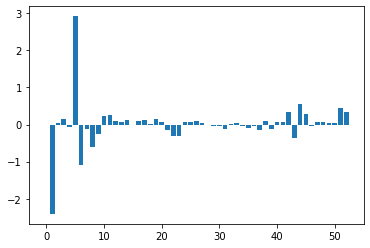

In [90]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Random Forest

In [92]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [93]:
rd_classifier_train_preds =rd_classifier.predict(X_train)
rd_classifier_preds=rd_classifier.predict(X_test)

precision_recall_fscore_support(y_train,rd_classifier_train_preds)
confusion_matrix(y_train,rd_classifier_train_preds)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3488,    0],
       [   0, 3470]], dtype=int64)

In [94]:
print(accuracy_score(y_test,rd_classifier_preds))
print(recall_score(y_test,rd_classifier_preds))
print(precision_score(y_test,rd_classifier_preds))
print(f1_score(y_test,rd_classifier_preds))

0.881896551724138
0.8357570573139436
0.9225684608120869
0.8770197486535009


In [95]:
print(classification_report(y_test,rd_classifier_preds))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1151
           1       0.92      0.84      0.88      1169

    accuracy                           0.88      2320
   macro avg       0.89      0.88      0.88      2320
weighted avg       0.89      0.88      0.88      2320



In [96]:
#Important features in the RF model
imp_dict={'Feature':X_train1.columns.to_list(),'Importance':rd_classifier.feature_importances_}
df_imp_dict=pd.DataFrame(imp_dict).sort_values(by='Importance',ascending=False).set_index('Feature')

In [97]:
df_imp_dict

,Importance
Feature,
duration,0.362835
euribor3m,0.103422
nr.employed,0.069402
age,0.056910
emp.var.rate,0.044756
cons.price.idx,0.029128
cons.conf.idx,0.028582
campaign,0.028091
pdays,0.022002


In [147]:
import xgboost as xgb

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)
num_boost_round = 999

params={'max_depth': 6,
 'min_child_weight': 1,
 'eta': .3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic'}

model=xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.53414
[1]	Test-logloss:0.44478
[2]	Test-logloss:0.39203
[3]	Test-logloss:0.35783
[4]	Test-logloss:0.33420
[5]	Test-logloss:0.31905
[6]	Test-logloss:0.30985
[7]	Test-logloss:0.30244
[8]	Test-logloss:0.30003
[9]	Test-logloss:0.29658
[10]	Test-logloss:0.29285
[11]	Test-logloss:0.29079
[12]	Test-logloss:0.29100
[13]	Test-logloss:0.29088
[14]	Test-logloss:0.28971
[15]	Test-logloss:0.29135
[16]	Test-logloss:0.29026
[17]	Test-logloss:0.29075
[18]	Test-logloss:0.29181
[19]	Test-logloss:0.29174
[20]	Test-logloss:0.29097
[21]	Test-logloss:0.29041
[22]	Test-logloss:0.29003
[23]	Test-logloss:0.29106


In [148]:
# Define initial best params and MAE
min_error = float("Inf")
best_params = None
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    #print(cv_results)
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=9, min_child_weight=5
	Error 0.11267569845558889 for 12 rounds
CV with max_depth=9, min_child_weight=6
	Error 0.11051928654651826 for 12 rounds
CV with max_depth=9, min_child_weight=7
	Error 0.11181280315988662 for 15 rounds
CV with max_depth=10, min_child_weight=5
	Error 0.11325010122544768 for 12 rounds
CV with max_depth=10, min_child_weight=6
	Error 0.11210026277299885 for 12 rounds
CV with max_depth=10, min_child_weight=7
	Error 0.11166902170769397 for 16 rounds
CV with max_depth=11, min_child_weight=5
	Error 0.1116684019600552 for 17 rounds
CV with max_depth=11, min_child_weight=6
	Error 0.11310570002561622 for 12 rounds
CV with max_depth=11, min_child_weight=7
	Error 0.11152544683804755 for 17 rounds
Best params: 9, 6, Error: 0.11051928654651826


In [109]:
params['max_depth'] = 9
params['min_child_weight'] = 6

In [111]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_error = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=1.0, colsample=1.0
	Error 0.11051928654651826 for 12 rounds
CV with subsample=1.0, colsample=0.9
	Error 0.114400352842989 for 23 rounds
CV with subsample=1.0, colsample=0.8
	Error 0.11195637802953304 for 14 rounds
CV with subsample=1.0, colsample=0.7
	Error 0.11310600989943562 for 14 rounds
CV with subsample=0.9, colsample=1.0
	Error 0.11310683622962063 for 21 rounds
CV with subsample=0.9, colsample=0.9
	Error 0.11468760587355495 for 11 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.11238813555120356 for 21 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.11368320153366882 for 19 rounds
CV with subsample=0.8, colsample=1.0
	Error 0.11339398596891348 for 21 rounds
CV with subsample=0.8, colsample=0.9
	Error 0.1121012956857301 for 14 rounds
CV with subsample=0.8, colsample=0.8
	Error 0.11310776585107878 for 17 rounds
CV with subsample=0.8, colsample=0.7
	Error 0.11281978978160094 for 18 rounds
CV with subsample=0.7, colsample=1.0
	Error 0.11339439913400598 for

In [112]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [114]:
min_error = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['error'],early_stopping_rounds=10)
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
CPU times: total: 8 s
Wall time: 1.05 s
	Error 0.11051928654651826 for 12 rounds

CV with eta=0.2
CPU times: total: 9.34 s
Wall time: 1.24 s
	Error 0.11080591982944546 for 13 rounds

CV with eta=0.1
CPU times: total: 12.5 s
Wall time: 1.61 s
	Error 0.1139674591173141 for 20 rounds

CV with eta=0.05
CPU times: total: 17.1 s
Wall time: 2.22 s
	Error 0.1145434112562698 for 32 rounds

CV with eta=0.01
CPU times: total: 38.4 s
Wall time: 5.45 s
	Error 0.11842396109637487 for 87 rounds

CV with eta=0.005
CPU times: total: 27 s
Wall time: 3.98 s
	Error 0.12101161407075038 for 57 rounds

Best params: 0.3, Error: 0.11051928654651826


In [115]:
params['eta'] = .3

In [131]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [140]:
params

{'max_depth': 9,
 'min_child_weight': 5,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'binary:logistic'}

In [122]:
print(accuracy_score(y_test,y_preds1))

0.8827586206896552


In [123]:
print(classification_report(y_test,y_preds1))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1151
           1       0.92      0.84      0.88      1169

    accuracy                           0.88      2320
   macro avg       0.89      0.88      0.88      2320
weighted avg       0.89      0.88      0.88      2320



In [142]:
import xgboost as xgb

In [143]:
xgb = xgb.XGBClassifier(max_depth=9,
 min_child_weight= 5,
 eta=0.3,
 subsample= 1,
 colsample_bytree= 1)
xgb.fit(X_train,y_train)

#calculate and print scores for the model
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

In [144]:
print(xgb.score(X_test,y_test))
print(xgb.score(X_train,y_train))

0.875
0.9810290313308422


In [145]:
print(classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1151
           1       0.90      0.84      0.87      1169

    accuracy                           0.88      2320
   macro avg       0.88      0.88      0.87      2320
weighted avg       0.88      0.88      0.87      2320



In [62]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_undersample1[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_undersample1=data_undersample1.drop(columns=i)
    data_undersample1=data_undersample1.join(one_hot)

In [64]:
data_undersample1

,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
16177,443,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
14758,715,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3404,584,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
33712,785,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
32296,269,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,208,1,6,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
41178,483,2,3,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
41181,281,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
41183,334,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [65]:
#Input of data
X_under1=data_undersample1.drop(columns=['y_no'])

#Output of data
y_under1=data_undersample1['y_no']

In [66]:
#Data normalization
Scaler=StandardScaler()
X_under1_=Scaler.fit_transform(X_under1)

In [68]:
#75% of training and 25% of testing
X_train_under1,X_test_under1,y_train_under1,y_test_under1=train_test_split(X_under1_,y_under1,test_size=0.25,random_state=0)

In [69]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train_under1,y_train_under1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [70]:
rd_classifier_train_preds =rd_classifier.predict(X_train_under1)
rd_classifier_preds=rd_classifier.predict(X_test_under1)

precision_recall_fscore_support(y_train_under1,rd_classifier_train_preds)
confusion_matrix(y_train_under1,rd_classifier_train_preds)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3488,    0],
       [   1, 3469]], dtype=int64)

In [73]:
print(classification_report(y_test_under1,rd_classifier_preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1151
           1       0.88      0.81      0.84      1169

    accuracy                           0.85      2320
   macro avg       0.85      0.85      0.85      2320
weighted avg       0.85      0.85      0.85      2320

